# Creating a model based on the MNIST Dataset of Handwritten Dizits

Step 1: Loading our Dataset

In [1]:
from keras.datasets import mnist
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

Using TensorFlow backend.


(60000, 28, 28)


Step 2: Examining the size and image dimensions

1. Check the number of samples, dimensions and whether the images are color or grayscale
2. We see that our training data consists of 60,000 samples of training data, 10,000 samples of test data
3. Our labels are appropriately sized as well
4. Our image dimensions are 28x28, with no color channels (i.e. the are grayscale, so no BGR channels)

In [2]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()

print ("Dimensions of x_train: " + str(x_train[0].shape))
print ("Labels in x_train: " + str(y_train.shape))
print()

print ("Dimensions of x_test: " + str(x_test[0].shape))
print ("Labels in y_test: " + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)

Dimensions of x_test: (28, 28)
Labels in y_test: (10000,)


Step 3: Looking at some of the images in this dataset
    1. Using OpenCV
    2. Using Matplotlib

In [3]:
# Using OpenCV
# import opencv and numpy
import cv2
import numpy as np

# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

Doing the same thing but using matplotlib to plot the images

Matplotlib is building the font cache; this may take a moment.


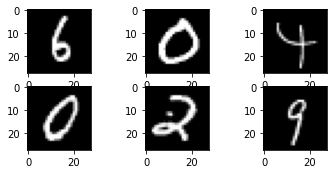

In [4]:
# importing matplotlib lib
import matplotlib.pyplot as plt

# plot 6 images, note subplot's arugments are nrows, ncols, index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

Step 4: Preparing our dataset for columns

In [5]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for keras
# We need to add a 4th dimension to our data thereby changing
# our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape image of a single image
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Step 5: One Hot Encoder our Labels(Y)

In [6]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Step 6: Creating our Model

1. we are building a simple but effective CNN that uses 32 filters of size 3x3
2. we have added a 2nd CONV layer of 64 filters of the same size 3x2
3. we then downsample our data to 2x2 here we apply a dropout where p is set to 0.25
4. we then flateen our max pool output that is connected to a dense/fc layer that has an output size of 128
5. how we apply a dropout where P is set to 0.5
6. Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
______________________________________

Step 7: Plotting our Model

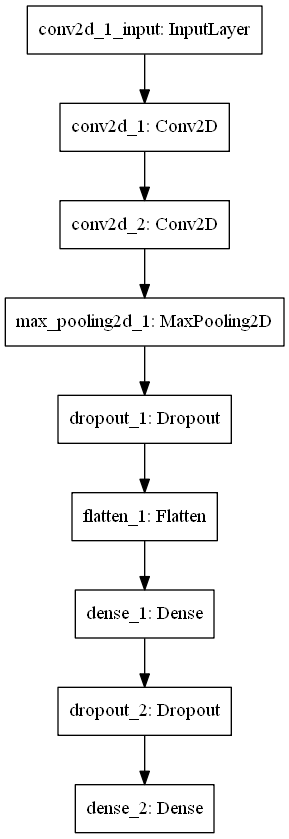

In [9]:
keras.utils.plot_model(
    model,
    to_file="model.png"
)

Step 8: Training our Model
    1. We place our formatted data as the inputs and set the batch size, number of epochs
    2. We store our model's training results for plotting in future
    3. We then use Keras mode.evaluate function to output the model's final performace. Here we are examining test loss and tst accuracy

In [10]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 652s 11ms/step - loss: 0.5987 - accuracy: 0.8115 - val_loss: 0.1979 - val_accuracy: 0.9407
Epoch 2/10
60000/60000 [==============================] - 825s 14ms/step - loss: 0.2954 - accuracy: 0.9100 - val_loss: 0.1423 - val_accuracy: 0.9547
Epoch 3/10
60000/60000 [==============================] - 956s 16ms/step - loss: 0.2278 - accuracy: 0.9308 - val_loss: 0.1027 - val_accuracy: 0.9690
Epoch 4/10
60000/60000 [==============================] - 615s 10ms/step - loss: 0.1748 - accuracy: 0.9483 - val_loss: 0.0813 - val_accuracy: 0.9753
Epoch 5/10
60000/60000 [==============================] - 594s 10ms/step - loss: 0.1457 - accuracy: 0.9571 - val_loss: 0.0690 - val_accuracy: 0.9779
Epoch 6/10
60000/60000 [==============================] - 602s 10ms/step - loss: 0.1246 - accuracy: 0.9617 - val_loss: 0.0620 - val_accuracy: 0.9811
Epoch 7/10
60000/60000 [==============================]

Step 9: Plotting our Loss and Accuracy Charts

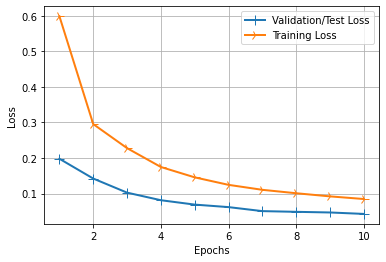

In [11]:
# plotting out loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
history.history

{'val_loss': [0.19792053527832032,
  0.1422847957253456,
  0.10265195153020322,
  0.08134912648648024,
  0.0690040690519847,
  0.06195046594315209,
  0.05068751310631633,
  0.04869222410401562,
  0.04688486627079547,
  0.04282149019044591],
 'val_accuracy': [0.9406999945640564,
  0.9546999931335449,
  0.968999981880188,
  0.9753000140190125,
  0.9779000282287598,
  0.9811000227928162,
  0.9835000038146973,
  0.9847000241279602,
  0.9854999780654907,
  0.9861000180244446],
 'loss': [0.5987136093576749,
  0.29539767438471315,
  0.22781136682927608,
  0.17478185750742753,
  0.14565723786974946,
  0.1245721007719636,
  0.11060830563803514,
  0.10097136795446277,
  0.09216441287609438,
  0.08473091915907958],
 'accuracy': [0.8114833,
  0.91,
  0.93075,
  0.9482833,
  0.95708334,
  0.96175,
  0.96715,
  0.96968335,
  0.9722667,
  0.9745]}

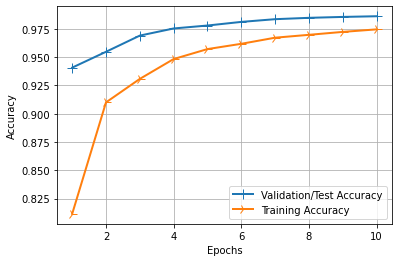

In [13]:
# Plotting the accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Step 10: Saving our Model

In [14]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


Step 11: Loading our Model

In [15]:
from keras.models import load_model
classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

Step 12: Lets input some of our test data into our classifier

In [16]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    
    
for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    
    draw_test("Prediction", res, imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()